In [8]:
import seaborn as sns
sns.set()

In [9]:
import numpy as np

# Day 4


In [10]:
import pandas as pd

In [11]:
# %%bash
# wget https://data.cityofnewyork.us/resource/bug8-9f3g.csv -nc 

In [12]:
df=pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df.head()

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

## 1. How many different companies are represented in the data set?

In [19]:
print('Number of Companies = ', df['Company Name'].nunique())

Number of Companies =  439


## 2. What is the total number of jobs created for businesses in Queens?

In [37]:
x=df.query("City=='Queens'")['Job created'].sum()
print('Number of jobs in Queens= ',x)

Number of jobs in Queens=  90.0


## 3. How many different unique email domains names are there in the data set?

In [48]:
domains=df['company email'].dropna().str.split('@').str[1]


In [49]:
print('Number of unique e-mail domains = ', domains.nunique())

Number of unique e-mail domains =  356


## 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 

In [91]:
cutoff_5=df.groupby('NTA').size()>=5
avg_tot_sav=df.groupby('NTA').agg({'Total Savings': np.mean, 'Job created': np.sum})

result=avg_tot_sav[cutoff_5]

result=result.rename(columns={'Total Savings': 'Average Total Savings','Job created': 'Total Job created'})
display(result)


,Average Total Savings,Total Job created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


## 5. Save to csv

In [93]:
result.to_csv('NTA_avg_tot_savings_tot_jobs.csv')

# Day 5

In [139]:
import matplotlib.pyplot as plt


## 1. Scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.


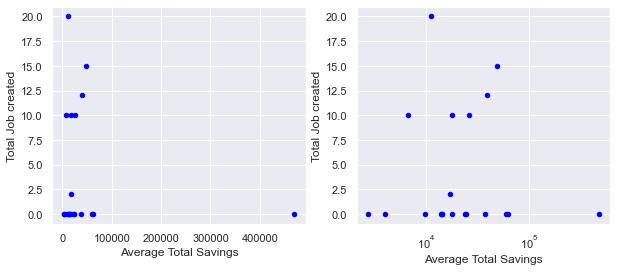

In [147]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

result.plot.scatter(x='Average Total Savings', y='Total Job created', c='Blue',ax=axes[0])

result.plot.scatter(x='Average Total Savings', y='Total Job created', c='Blue',ax=axes[1])
axes[1].set_xscale("log")


## 2. Histogram of the log of the average total savings.

Text(0.5, 0, 'log(Average Total savings)')

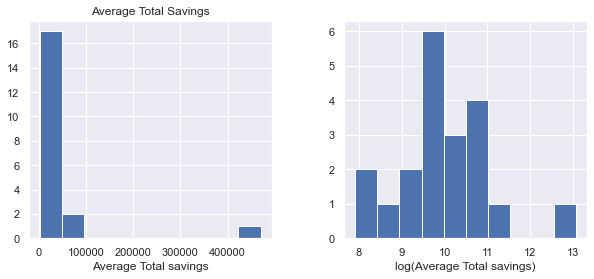

In [154]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

result.hist('Average Total Savings',ax=axes[0])
axes[0].set_xlabel('Average Total savings')

np.log(result['Average Total Savings']).hist(ax=axes[1])
axes[1].set_xlabel('log(Average Total savings)')


## 3. Line plot of the total jobs created for each month.

In [121]:
df['Effective Date']=pd.to_datetime(df['Effective Date'])
job_month=df.groupby(df['Effective Date'].dt.month)['Job created'].sum()

Text(0, 0.5, 'Total jobs Created')

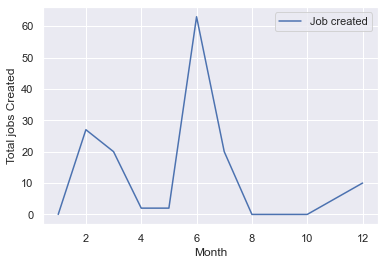

In [137]:

ax=job_month.to_frame().plot.line()
ax.set_xlabel('Month')
ax.set_ylabel('Total jobs Created')
